<a href="https://colab.research.google.com/github/millenagena/Bootcamp_Data_Science_Alura/blob/main/Module%201/notebooks/Class_2_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Aula 02: Primeiras Visualizações de Dados

- Analisando agora os dados: Valor total por Ano/mês atendimento segundo Unidade da Federação
- Como realizar um slice no DataFrame com Pandas;
- Formas de lidar com dados faltantes;
- Utilizar o insert do Pandas;
- Como transpor sua matriz de dados

In [ ]:
# carregando os dados
dados = pd.read_csv('/content/drive/MyDrive/Alura/Bootcamp Data Science Aplicada 2/Módulo 1/Dados/ano_mes_atendimento.csv', encoding='ISO-8859-1', 
                    skiprows=3, sep=';', skipfooter=12, decimal=',', engine = 'python')
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326741.17,8425584.62,7250895.87,7480169.47,8773060.38,9855164.17,8152115.78,4654767.46,9.319714e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3274600.36,2985439.26,2921021.35,2560191.29,2699663.11,2734200.04,2539104.34,1247105.57,4.243082e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14960241.10,15939561.23,15138403.32,14779400.90,16334958.99,19462656.55,17641464.85,13923160.62,5437280.35,1.773234e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35245256.63,37018890.04,34651720.48,34847368.52,28822614.86,41663224.72,36380109.76,29930766.75,14163089.96,4.443719e+09


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(158), object(122)
memory usage: 59.2+ KB


### Fazendo um fatiamento (slice) dos nossos dados

In [ ]:
dados[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


**Na nossa base de dados existem diversos campos com informações faltantes. Existem diferentes maneiras de resolver esse problema (ex: fillna, dropna), mas nesse caso, vamos excluir e desconsiderar os campos que estão vazios (NaN)**

In [ ]:
# traz as médias apenas das colunas que possuem todos os campos preenchidos

dados.mean() 

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Mai    4.697203e+07
2020/Jun    4.574672e+07
2020/Jul    4.147050e+07
2020/Ago    1.994693e+07
Total       5.996123e+09
Length: 158, dtype: float64

In [ ]:
# colunas_usaveis, pois nao possuem nenhum campo nulo
# colunas_usaveis = dados.mean().index # o index eh uma serie imutavel
# por isso transformamos em lista, pra podermos alterar

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [ ]:
# mostrando apenas os meses que possuem todos os valores

usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326741.17,8425584.62,7250895.87,7480169.47,8773060.38,9855164.17,8152115.78,4654767.46,9.319714e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3274600.36,2985439.26,2921021.35,2560191.29,2699663.11,2734200.04,2539104.34,1247105.57,4.243082e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14960241.10,15939561.23,15138403.32,14779400.90,16334958.99,19462656.55,17641464.85,13923160.62,5437280.35,1.773234e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.9

#### Tratando os dados faltantes

In [ ]:
# excluindo esses indices
# designando a coluna 'unidade da federação' como indice

usaveis = usaveis.set_index('Unidade da Federação')
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,4.423840e+06,...,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326741e+06,8.425585e+06,7.250896e+06,7.480169e+06,8.773060e+06,9.855164e+06,8.152116e+06,4.654767e+06,9.319714e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,2.512995e+06,...,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.274600e+06,2.985439e+06,2.921021e+06,2.560191e+06,2.699663e+06,2.734200e+06,2.539104e+06,1.247106e+06,4.243082e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,9.532878e+06,...,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.535161e+07,1.633943e+07,1.482198e+07,1.496024e+07,1.593956e+07,1.513840e+07,1.477940e+07,1.633496e+07,1.946266e+07,1.764146e+07,1.392316e+07,5.437280e+06,1.773234e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.0844

### Localizando uma coluna específica

In [ ]:
usaveis['2019/Ago'].head() # encontra a coluna 2019/Ago

Unidade da Federação
11 Rondônia     8909111.89
12 Acre         2981072.98
13 Amazonas    16493719.52
14 Roraima      3181321.82
15 Pará        36462011.47
Name: 2019/Ago, dtype: float64

### Localizando uma linha específica

In [ ]:
usaveis.loc['12 Acre'] # encontra a linha com o índice '12 Acre'

2007/Ago    1.047007e+04
2007/Set    1.400171e+04
2007/Out    8.620085e+04
2007/Nov    3.013237e+05
2007/Dez    7.696124e+05
                ...     
2020/Mai    2.699663e+06
2020/Jun    2.734200e+06
2020/Jul    2.539104e+06
2020/Ago    1.247106e+06
Total       4.243082e+08
Name: 12 Acre, Length: 158, dtype: float64

### Transpondo o DataFrame

In [ ]:
# transpondo o nosso dataframe
# trocando coluna por linha

usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


### Gráfico

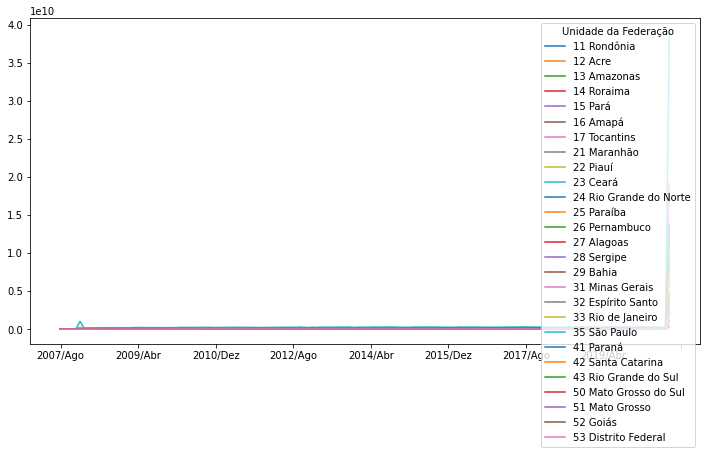

In [ ]:
usaveis.T.plot(figsize=(12,6))

In [ ]:
# essa parte do grafico que é maior que todas as outras deve ser o total
# nao queremos o total, entao vamos excluir essa coluna

usaveis = usaveis.drop('Total', axis=1) # axis = 1 (colunas), axis = 0 (linhas)

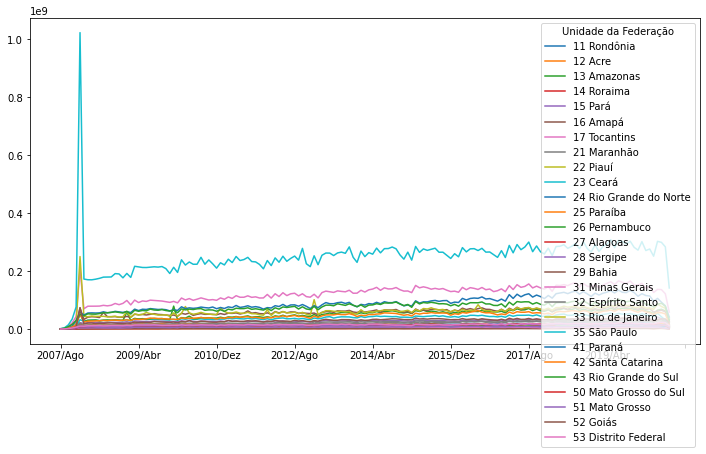

In [ ]:
usaveis.T.plot(figsize=(12,6))

# agora teremos uma linha para cada estado
# grafico esta horrivel, com a legenda mal posicionada e repetindo cores

Exportando o dataset "usaveis" para que possa ser utilizado nos próximos notebooks

In [ ]:
usaveis.to_csv(path_or_buf = '/content/drive/MyDrive/Alura/Bootcamp Data Science Aplicada 2/Módulo 1/Dados/usaveis.csv')

## Desafios Aula 02: 

### 1: Reposicionar a legenda

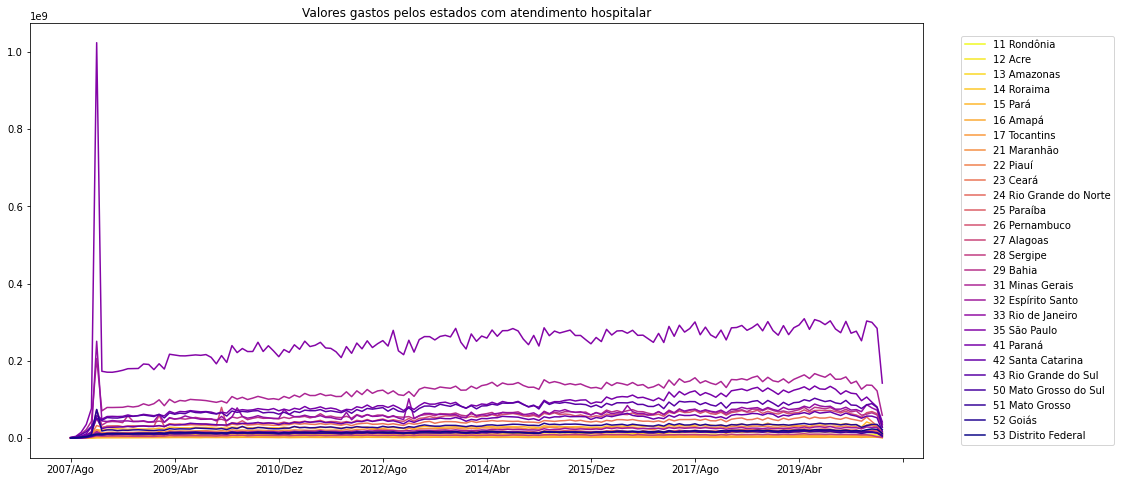

In [ ]:
###### desafio 1

usaveis.T.plot(figsize=(16,8), cmap=plt.get_cmap('plasma_r'))
plt.title('Valores gastos pelos estados com atendimento hospitalar')
plt.legend(loc = 'right', bbox_to_anchor = (1.22, 0.5))

### 2: Plotar o gráfico de linha com apenas 5 estados

In [ ]:
###### desafio 2

# criar uma lista com os estados escolhidos
estados = ['12 Acre', '53 Distrito Federal', '51 Mato Grosso', '29 Bahia']

# criando um novo dataframe apenas com os estados
df_estados = usaveis.loc[estados]
df_estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3274600.36,2985439.26,2921021.35,2560191.29,2699663.11,2734200.04,2539104.34,1247105.57
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,...,15531998.60,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,16543674.21,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16516213.32,15108438.61,13830817.13,15456284.98,14460000.76,14483101.59,12053219.15,14226454.24,14872087.55,13662875.86,7176902.35
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,73336297.08,33410124.06,41301703.40,42826993.62,42071294.17,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,41424654.95,43856594.59,41094717.03,51476930.68,49585513.41,50686984.15,48851108.39,51075073.25,53386058.82,50894817.50,50114090.45,48792856.88,47427830.70,48612

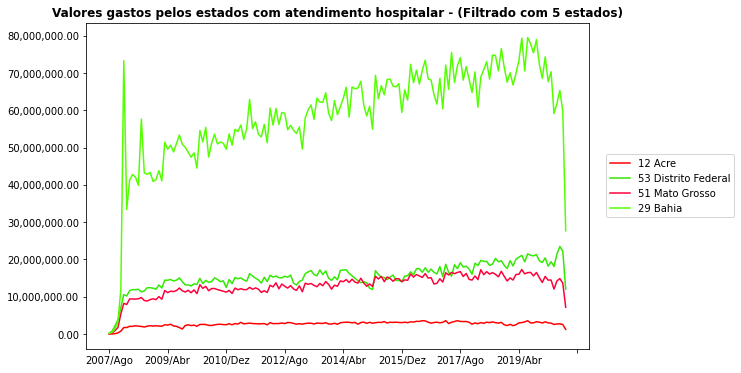

In [ ]:
# criando o gráfico
ax = df_estados.T.plot(figsize=(9,6), colormap='prism')

# formatando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Valores gastos pelos estados com atendimento hospitalar - (Filtrado com 5 estados)', fontweight = 'bold')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.show()